In [1]:
'''
 * @Author: 11921006 Peixin Zhang 
 * @Date: 2019-05-27
'''

'\n * @Author: 11921006 Peixin Zhang \n * @Date: 2019-05-27\n'

In [2]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [3]:
def sin_func(x):
    return np.sin(x)

In [4]:
def poly_func(w, x):
    f = np.poly1d(w)
    return f(x)

In [5]:
def err_func(w, y, x):
    return y - poly_func(w, x)

In [6]:
def reg_err_func(w, y, x):
    reg_err = y - poly_func(w, x)
    reg_err = np.append(reg_err, np.sqrt(np.e**(1/9)) * w)
    return reg_err

In [7]:
def show(n,m,Regularization):
    x = np.linspace(0, 2*np.pi, n)
    y0 = sin_func(x)
    y1 = [np.random.normal(0, 0.1) + y for y in y0]
    w = np.polyfit(x,y1,m)
    if Regularization == 'FALSE':
        plsq = opt.leastsq(err_func, w, args=(y1, x))
    else:
        plsq = opt.leastsq(reg_err_func, w, args=(y1, x))
    plt.figure(figsize = (6,4))
    plt.plot(np.linspace(0, 2*np.pi, 100), sin_func(np.linspace(0, 2*np.pi, 100)), 'g-', label='sin(x)')
    plt.plot(np.linspace(0, 2*np.pi, 100), poly_func(plsq[0], np.linspace(0, 2*np.pi, 100)), 'r', label='fitted curve')
    plt.plot(x, y1, 'bo', label='noise point')
    plt.xlabel('x')
    plt.ylabel('t')
    plt.xlim(-0.2,2*np.pi + 0.2)
    plt.ylim(-1.4,1.4)
    plt.legend()
    if Regularization == 'FALSE':
        title = "degree = " + str(m) + " sample = "  + str(n)
        plt.title(title)
        plt.savefig("degree = " + str(m) + " sample = "  + str(n) + ".png")
    else:
        title = "degree = " + str(m) +   " sample = "  + str(n) + " with regularization term"
        plt.title(title)
        plt.savefig("degree = " + str(m) +   " sample = "  + str(n) + " with regularization term.png")    
    plt.show() 

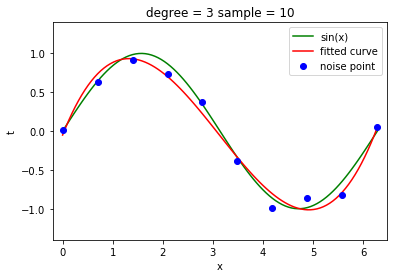

In [8]:
show(10,3,'FALSE')# fit degree 3 curve in 10 samples

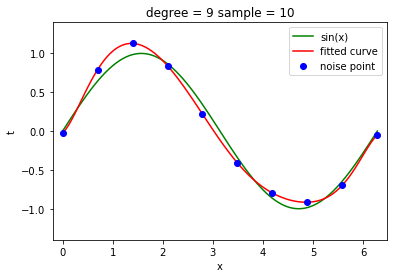

In [9]:
show(10,9,'FALSE')# fit degree 9 curve in 10 samples

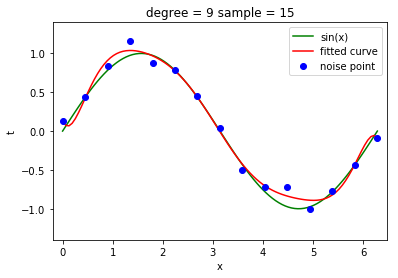

In [10]:
show(15,9,'FALSE')# fit degree 9 curve in 15 samples

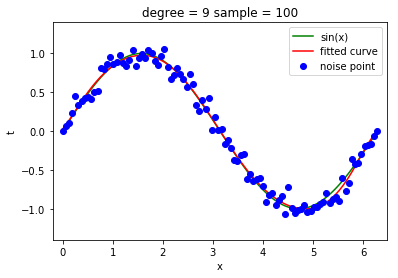

In [11]:
show(100,9,'FALSE')# fit degree 9 curve in 100 samples

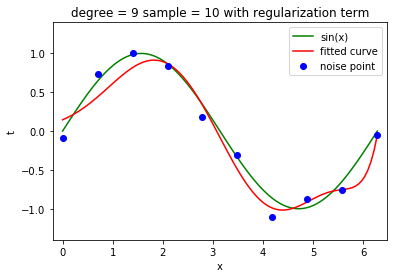

In [12]:
show(10,9,'True')# fit degree 9 curve in 10 samples but with regularization term